#Outlier Detection using Local Outlier Factor (LOF)

## What is LOF?

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. <br>
It considers the samples that have a substantially lower density than their neighbors as outliers. <br>
 The local density is inversely correlated with the average distance from a point to its nearest neighbors. The anomaly score in LOF is known as the local outlier factor score.<br>
 LOF uses two hyperparameters: neighborhood size and contamination. The neighborhood  defines the neighborhood for the
computation of local density. 
 The contamination determines the proportion of the most isolated points (points that have the highest local outlier factor scores) to be predicted as anomalies.


An outlier is a data point that is different or far from the rest of the data points. LOF performs well when the density of the data is not the same throughout the dataset.

## Example
In this figure we have set neighborhood size to be 2 and contamination to
be 0.25. Since A is the most isolated point in terms of finding the two nearest neighbors among
the four points, the LOF method predicts it as an anomaly.

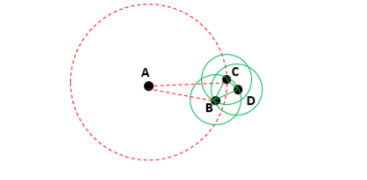

## LOF FORMULA

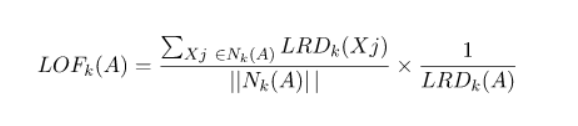

## K-DISTANCE AND K-NEIGHBORS
K-distance is the distance between the point, and it’s Kᵗʰ nearest neighbor. K-neighbors denoted by Nₖ(A) includes a set of points that lie in or on the circle of radius K-distance.

## REACHABILITY DENSITY (RD)
It is defined as the maximum of K-distance of Xj and the distance between Xi and Xj.

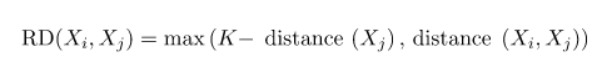


## LOCAL REACHABILITY DENSITY (LRD)
LRD is inverse of the average reachability distance of A from its neighbors. Intuitively according to LRD formula, more the average reachability distance (i.e., neighbors are far from the point), less density of points are present around a particular point. 

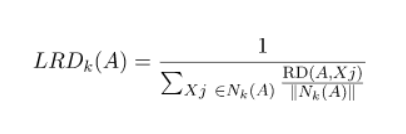

##ADVANTAGES OF LOF
A point will be considered as an outlier if it is at a small distance to the extremely dense cluster. The global approach may not consider that point as an outlier. But the LOF can effectively identify the local outliers.
##DISADVANTAGES OF LOF
Since LOF is a ratio, it is tough to interpret. There is no specific threshold value above which a point is defined as an outlier. The identification of an outlier is dependent on the problem and the user.

### Code for Local Outlier Factor using creditcard.csv dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [ ]:
df=pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(df.shape)
data=df.sample(frac=0.2,random_state=1) #extracting 20 percent of total as sample
print(data.shape)

(284807, 31)
(56961, 31)


In [ ]:
# Determining number of fraud and normal samples.

Text(0, 0.5, 'Frequency')

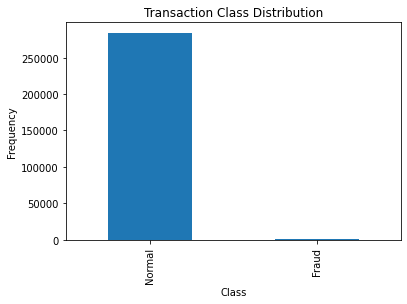

In [ ]:
num_classes=pd.value_counts(df['Class'],sort=True)
num_classes.plot(kind='bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(2),["Normal","Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")


In [ ]:
#For total orignal dataset
fraud=df[df['Class']==1] #taking those with class as 1 as fraud
normal=df[df['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [ ]:
# For sample
fraud_frac=data[data['Class']==1] #taking those with class as 1 as fraud
normal_frac=data[data['Class']==0]
print(fraud_frac.shape,normal_frac.shape)

(87, 31) (56874, 31)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f603fe09790>,
      dtype=object)

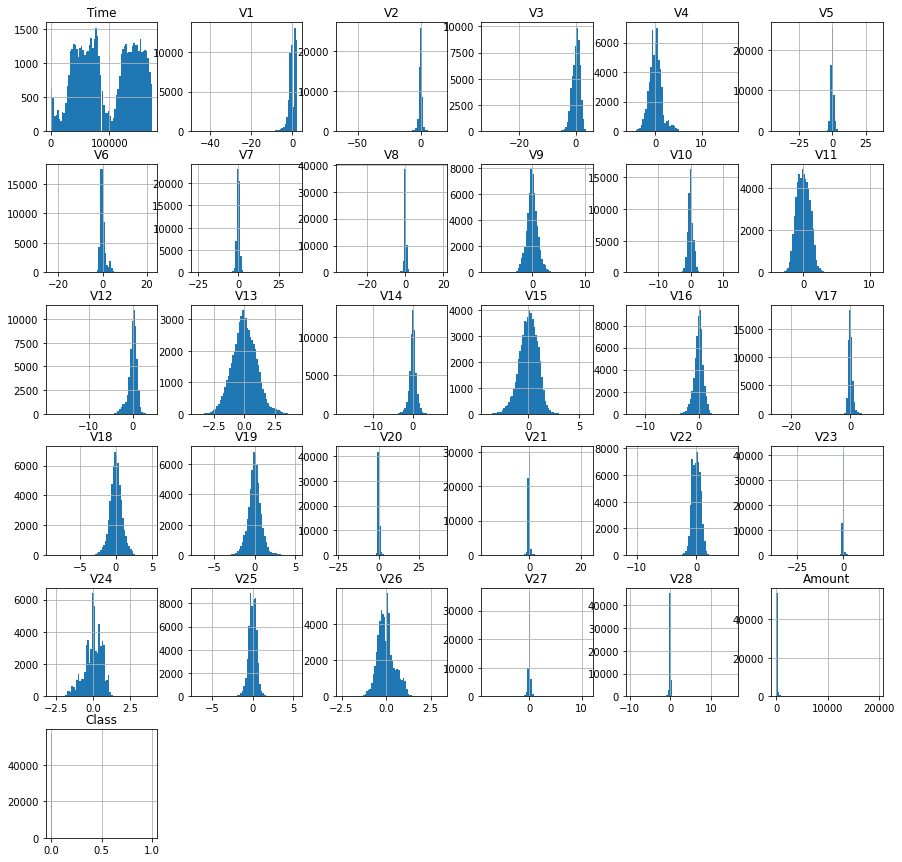

In [ ]:
data.hist(figsize=(15,15), bins=64)

In [ ]:
data.shape

(56961, 31)

In [ ]:
columns=data.columns.tolist()
target=columns[-1]
features=columns[:-1]

In [ ]:
#Splitting into trainand test
X_train=data.iloc[:37400,1:-1]  #removed class column.We have not taken time
y_train=data.iloc[:37400, -1]
X_test=data.iloc[45000:,1:-1]
y_test=data.iloc[45000:,-1]

In [ ]:
print(X_train.shape,X_test.shape)

(37400, 29) (11961, 29)


### Create the model using LOF


In [ ]:
anamoly_fraction= len(fraud_frac)/float(len(data))
model= LocalOutlierFactor(contamination=anamoly_fraction)    #score 1: inlier, -1=outlier


In [ ]:
#fit model and predict
y_train_pred=model.fit_predict(X_train) #unsupervised. don't need labels

In [ ]:
y_train_pred[y_train_pred==1]=0   #score 1: inlier, -1=outlier
y_train_pred[y_train_pred==-1]=1


In [ ]:
y_test_pred=model.fit_predict(X_test) 

In [ ]:
y_test_pred[y_test_pred==1]=0   #score 1: inlier, -1=outlier
y_test_pred[y_test_pred==-1]=1

For Train set validation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Text(0.5, 1.0, 'Confusion matrix')

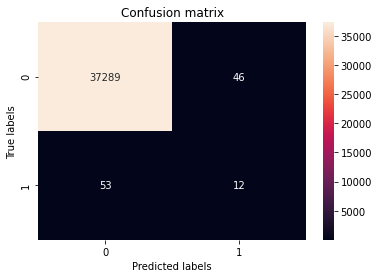

In [ ]:
# Evaluate model. Plot confusion matrix
import seaborn as sns

cm_train=confusion_matrix(y_train,y_train_pred)
ax=plt.subplot()
sns.heatmap(cm_train,annot=True,fmt='g',ax=ax)
ax=plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')


In [ ]:
# Out of 65 anamolies model predicted 12 correctly.

Prediction for Test set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 1.0, 'Confusion matrix')

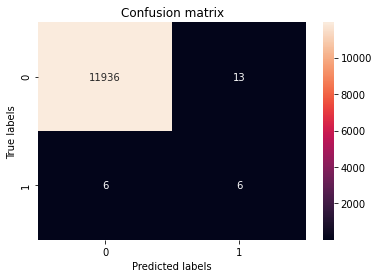

In [ ]:

cm_test=confusion_matrix(y_test,y_test_pred)
ax=plt.subplot()
sns.heatmap(cm_test,annot=True,fmt='g',ax=ax)
ax=plt.subplot()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')


In [ ]:
# Out of 12 anamolies 6 predicted correctly